<a href="https://colab.research.google.com/github/InutilemMachina/DataSciRepo/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

## Linear Regression

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = False)
%cd /content/drive/MyDrive/Colab Notebooks/VibrationMapping

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/VibrationMapping


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VibrationMapping/speed_peak_rms.csv')
df.columns = ['speed','peak','rms'] # renaming for convenience
df

,speed,peak,rms
0,20.2,0.753158,0.329317
1,24.8,0.671181,0.313857
2,19.5,0.769624,0.343261
3,14.8,0.679059,0.322485
4,11.6,0.753158,0.325649
...,...,...,...
1784,41.9,0.984042,0.139628
1785,39.7,0.333266,0.093560
1786,36.3,0.283867,0.102427
1787,32.3,0.349732,0.118092


Text(0, 0.5, '$x_{stats} [m/s^2]$')

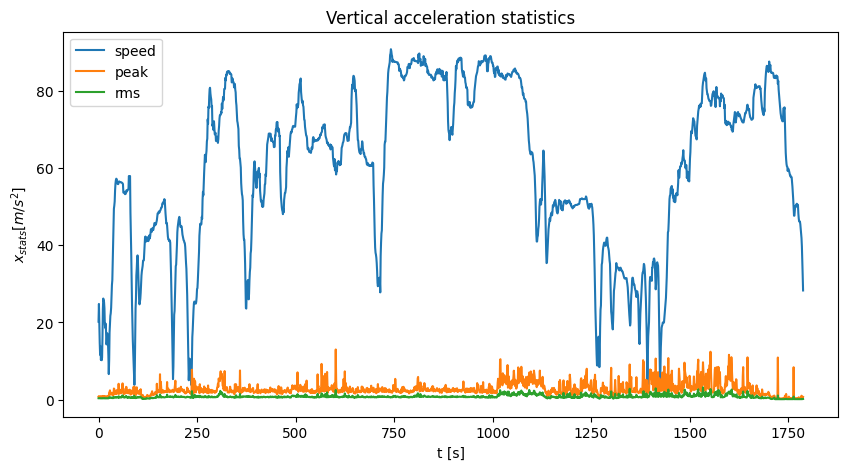

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize = [10,5])
ax.plot(df.speed, '-', label='speed')
ax.plot(df.peak, '-', label='peak')
ax.plot(df.rms,'-', label='rms')
ax.set_title('Vertical acceleration statistics')
ax.legend()
ax.set_xlabel('t [s]')
ax.set_ylabel('$x_{stats} [m/s^2]$')

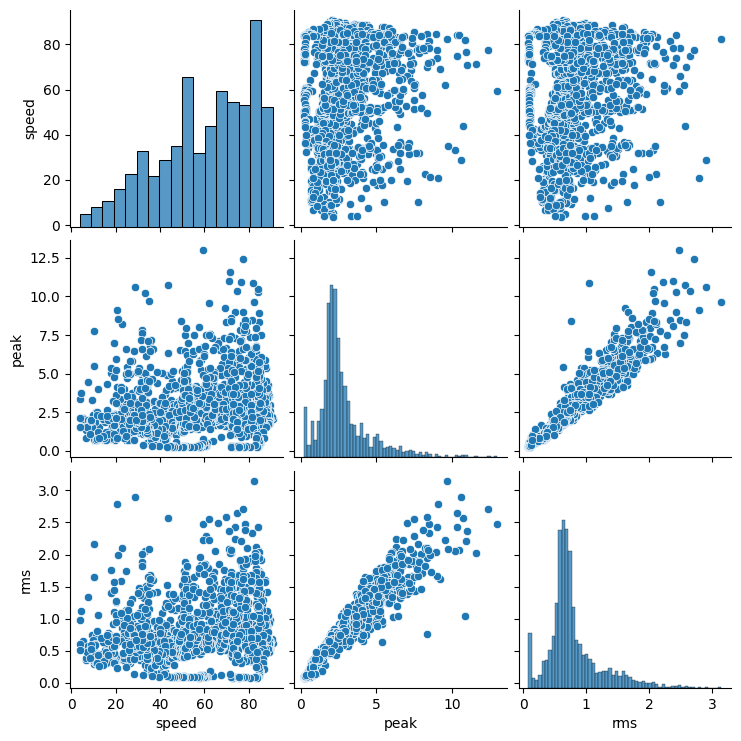

In [5]:
import seaborn as sns
sns.pairplot(df)

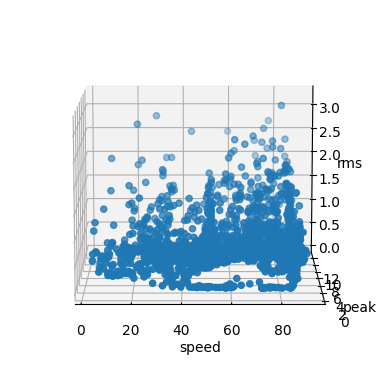

In [6]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(df.speed, df.peak, df.rms)

ax.set_xlabel('speed')
ax.set_ylabel('peak')
ax.set_zlabel('rms')
ax.view_init(elev=10, azim=-90, roll=0)
plt.show()

In [7]:
import plotly.express as px
import plotly.io as pio

fig = px.scatter_3d(df, x='speed', y='peak', z='rms', template='none')
fig.update_traces(marker_size = 1)
fig.update_layout(scene=dict(xaxis_showspikes=False,
                             yaxis_showspikes=False))
fig.show()

Text(0, 0.5, '$rms_Z [m/s^2]$')

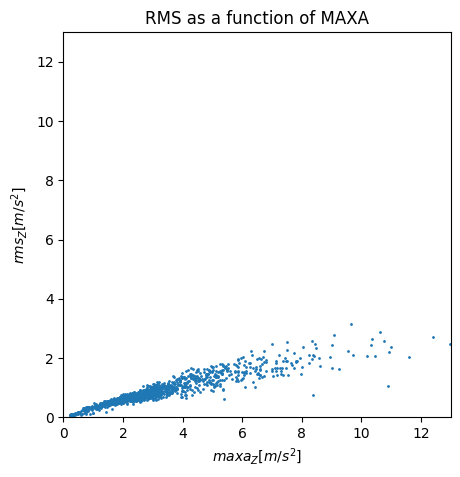

In [8]:
fig, ax = plt.subplots(1,1,figsize = [5,5])
ax.scatter(df.peak, df.rms, 1)
ax.set_xlim([0,13])
ax.set_ylim([0,13])
ax.set_title('RMS as a function of MAXA')
ax.set_xlabel('$maxa_Z [m/s^2]$')
ax.set_ylabel('$rms_Z [m/s^2]$')

split dataset

Text(0, 0.5, '$rms_Z [m/s^2]$')

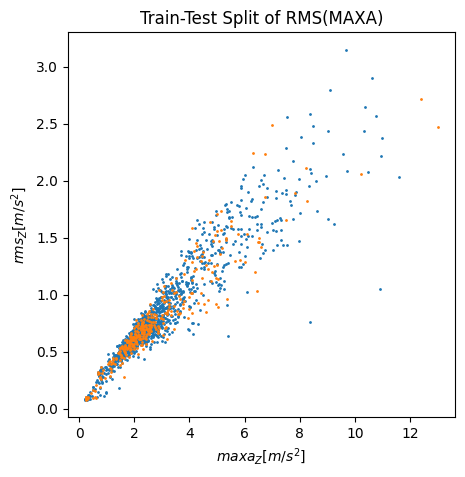

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train, test = train_test_split(df, test_size=0.2)
fig, ax = plt.subplots(1,1,figsize = [5,5])
ax.scatter(train.peak, train.rms, 1)
ax.scatter(test.peak, test.rms, 1)
ax.set_title('Train-Test Split of RMS(MAXA)')
ax.set_xlabel('$maxa_Z [m/s^2]$')
ax.set_ylabel('$rms_Z [m/s^2]$')

linear regression on train

In [10]:
# LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
import numpy as np

xpeak = np.asarray(train['peak'])
print(xpeak)

X = xpeak.reshape((-1, 1))
print(X)

y= np.asarray(train['rms'])
print(y)

reg = LinearRegression().fit(X,y)
reg

[6.72256251 3.28932983 1.63446228 ... 2.80357269 1.5929411  2.06258722]
[[6.72256251]
 [3.28932983]
 [1.63446228]
 ...
 [2.80357269]
 [1.5929411 ]
 [2.06258722]]
[1.39598407 0.87859011 0.53694241 ... 0.64848297 0.50889621 0.69231583]


LinearRegression()

Text(0, 0.5, '$rms_Z [m/s^2]$')

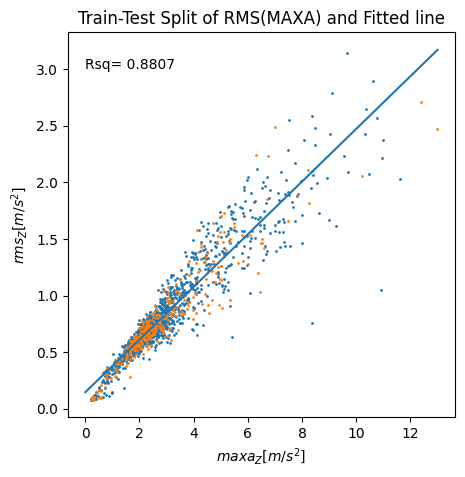

In [11]:
Rsq = reg.score(X, y)  # Rsq
m = reg.coef_  # derivative
b = reg.intercept_  # intercept

Xeq = np.array([0, 13])
Yeq = m*Xeq + b

fig, ax = plt.subplots(1,1,figsize = [5,5])
ax.scatter(train.peak, train.rms, 1)
ax.scatter(test.peak, test.rms, 1)
ax.plot(Xeq,Yeq, 1)
ax.text(0,3,'Rsq= ' + str(round(Rsq,4)))
ax.set_title('Train-Test Split of RMS(MAXA) and Fitted line')
ax.set_xlabel('$maxa_Z [m/s^2]$')
ax.set_ylabel('$rms_Z [m/s^2]$')

In [12]:
from sklearn.metrics import mean_squared_error as mse

Xeq_fine = np.linspace(min(train.peak), max(train.peak), len(train.peak))  # make a new X vector the same size azt train
Yeq_fine = m*Xeq_fine + b  # recalc the linear regression equation
mse_train = mse(np.asarray(train.rms), Yeq_fine)  # calculate MSE
mse_train

1.2973097682964538

In [13]:
Xeq_fine2 = np.linspace(min(test.peak), max(test.peak), len(test.peak))  # make a new X vector the same size azt test
Yeq_fine2 = m*Xeq_fine2 + b  # recalc the linear regression equation
mse_train2 = mse(np.asarray(test.rms), Yeq_fine2)  # calculate MSE
mse_train2

1.7978474171461896

In [14]:
"""
reg.predict(...) # Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
p = np.asarray(0.0)
print(p)

P = p.reshape(1, -1)
print(P)

p = np.asarray([0.0, 10.0])
print(p)

P = p.reshape(-1, 1)
print(P)
"""

'\nreg.predict(...) # Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.\np = np.asarray(0.0)\nprint(p)\n\nP = p.reshape(1, -1)\nprint(P)\n\np = np.asarray([0.0, 10.0])\nprint(p)\n\nP = p.reshape(-1, 1)\nprint(P)\n'

logarithmic model?

In [15]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * np.log(x) + b

popt, pcov = curve_fit(func, train.peak, y)

print(popt)
a = popt[0]
b = popt[1]

print(pcov)

[0.58172804 0.2994503 ]
[[ 8.24073762e-05 -7.06409658e-05]
 [-7.06409658e-05  9.30810659e-05]]


Text(0, 0.5, '$rms_Z [m/s^2]$')

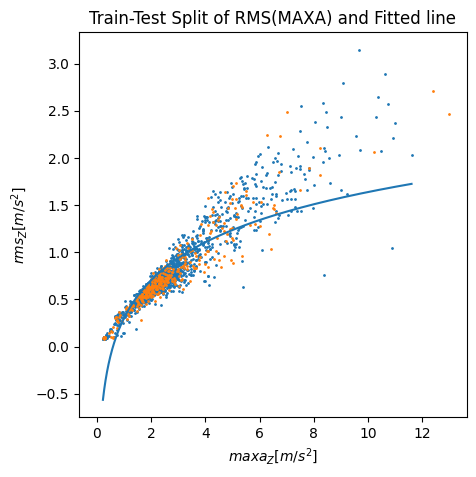

In [16]:
Yeq_fine_log = func(Xeq_fine,a,b)

fig, ax = plt.subplots(1,1,figsize = [5,5])
ax.scatter(train.peak, train.rms, 1)
ax.scatter(test.peak, test.rms, 1)
ax.plot(Xeq_fine, Yeq_fine_log, 1)

ax.set_title('Train-Test Split of RMS(MAXA) and Fitted line')
ax.set_xlabel('$maxa_Z [m/s^2]$')
ax.set_ylabel('$rms_Z [m/s^2]$')

refit linear with outlier removal

Text(0, 0.5, '$rms_Z [m/s^2]$')

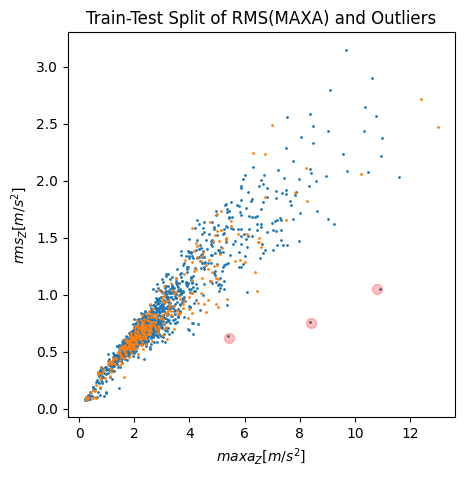

In [17]:
Rsq = reg.score(X, y)  # Rsq
m = reg.coef_  # derivative
b = reg.intercept_  # intercept

Xeq = np.array([0, 13])
Yeq = m*Xeq + b

fig, ax = plt.subplots(1,1,figsize = [5,5])
ax.scatter(train.peak, train.rms, 1)
ax.scatter(test.peak, test.rms, 1)
ax.scatter([5.45, 8.4, 10.8],[0.62, 0.75, 1.05],50,'r','o',alpha = 0.25)

ax.set_title('Train-Test Split of RMS(MAXA) and Outliers')
ax.set_xlabel('$maxa_Z [m/s^2]$')
ax.set_ylabel('$rms_Z [m/s^2]$')

In [18]:
#  plt.boxplot([df.peak,df.rms], labels=['peak', 'rms'])

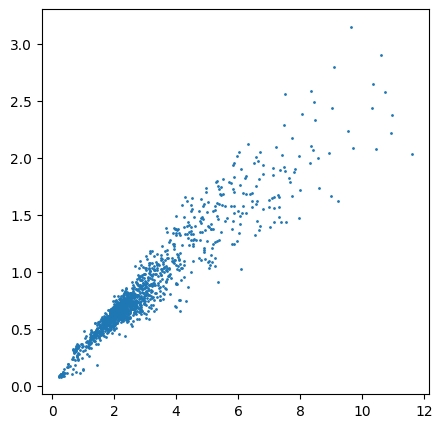

In [19]:
ou1 = df.query('5.4 < peak < 5.6 & 0.5 < rms < 0.65').index
ou2 = df.query('8 < peak < 9 & 0.7 < rms < 0.8').index
ou3 = df.query('10.5 < peak < 11.5 & 1.0 < rms < 1.1').index

train_filt = train.drop([ou1[0], ou2[0], ou3[0]])

fig, ax = plt.subplots(1,1,figsize = [5,5])
ax.scatter(train_filt.peak, train_filt.rms, 1)

Text(0, 0.5, '$rms_Z [m/s^2]$')

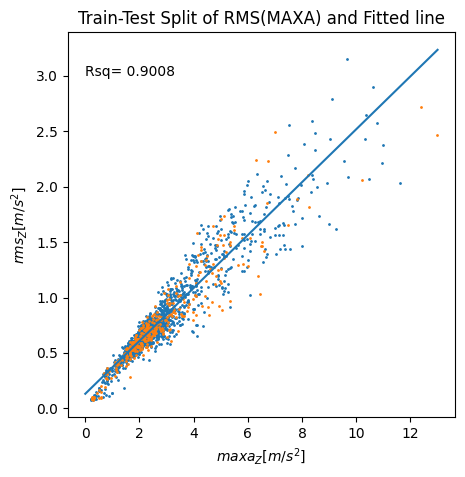

In [20]:
xpeak = np.asarray(train_filt['peak'])
X = xpeak.reshape((-1, 1))
y= np.asarray(train_filt['rms'])
reg = LinearRegression().fit(X,y)

Rsq = reg.score(X, y)  # Rsq
m = reg.coef_  # derivative
b = reg.intercept_  # intercept

Xeq = np.array([0, 13])
Yeq = m*Xeq + b

fig, ax = plt.subplots(1,1,figsize = [5,5])
ax.scatter(train_filt.peak, train_filt.rms, 1)
ax.scatter(test.peak, test.rms, 1)
ax.plot(Xeq,Yeq, 1)
ax.text(0,3,'Rsq= ' + str(round(Rsq,4)))
ax.set_title('Train-Test Split of RMS(MAXA) and Fitted line')
ax.set_xlabel('$maxa_Z [m/s^2]$')
ax.set_ylabel('$rms_Z [m/s^2]$')

improved Rsq

## Speed classes

In [25]:
df['classes'] = pd.cut(df['speed'], bins=[0, 20, 40, 60, 80, 100], labels=['c20', 'c40', 'c60', 'c80', 'c100'])
df

,speed,peak,rms,classes
0,20.2,0.753158,0.329317,c40
1,24.8,0.671181,0.313857,c40
2,19.5,0.769624,0.343261,c20
3,14.8,0.679059,0.322485,c20
4,11.6,0.753158,0.325649,c20
...,...,...,...,...
1784,41.9,0.984042,0.139628,c60
1785,39.7,0.333266,0.093560,c40
1786,36.3,0.283867,0.102427,c40
1787,32.3,0.349732,0.118092,c40


In [30]:
fig = px.scatter_3d(df, x='speed', y='peak', z='rms', color='classes',template='none')
fig.update_traces(marker_size = 1)
fig.show()